# Our first machine learning model: Logistic Regression

In [2]:
# Import our libraries 


import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import seaborn as sns

# Helper function to split our data
from sklearn.model_selection import train_test_split

# This is our Logit model
from sklearn.linear_model import LogisticRegression

# Helper fuctions to evaluate our model.
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix 

%matplotlib inline


# Import and inspect the Titanic dataset.
* Load the titanic data set into a pandas dataframe.

In [3]:
# Load the titanic data set into a pandas dataframe.
# # Load data
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.shape[0]

891

## Data dictionary
<img src='https://miro.medium.com/max/1260/1*rr3UGlpEv_PSMc1pyqa4Uw.png'>

# Identify which columns have null values. 
Inspect which varibles may be good / not good for using as features based on null values. 


In [5]:
# Identify which columns have null values. 
# Since there are 
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
print("The rows with null value on 'deck' column:", 100*df.deck.isnull().sum()/df.shape[0], "%")

The rows with null value on 'deck' column: 77.21661054994388 %


# Check to see if our data has any duplicate rows.
If so, remove the duplicates.

In [7]:
# Check to see if our data has any duplicate rows.
df.duplicated().sum()

107

In [8]:
# df = df.drop_duplicates()
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

# Use sns.pariplot to visualize.
* Set the hue='survived'.

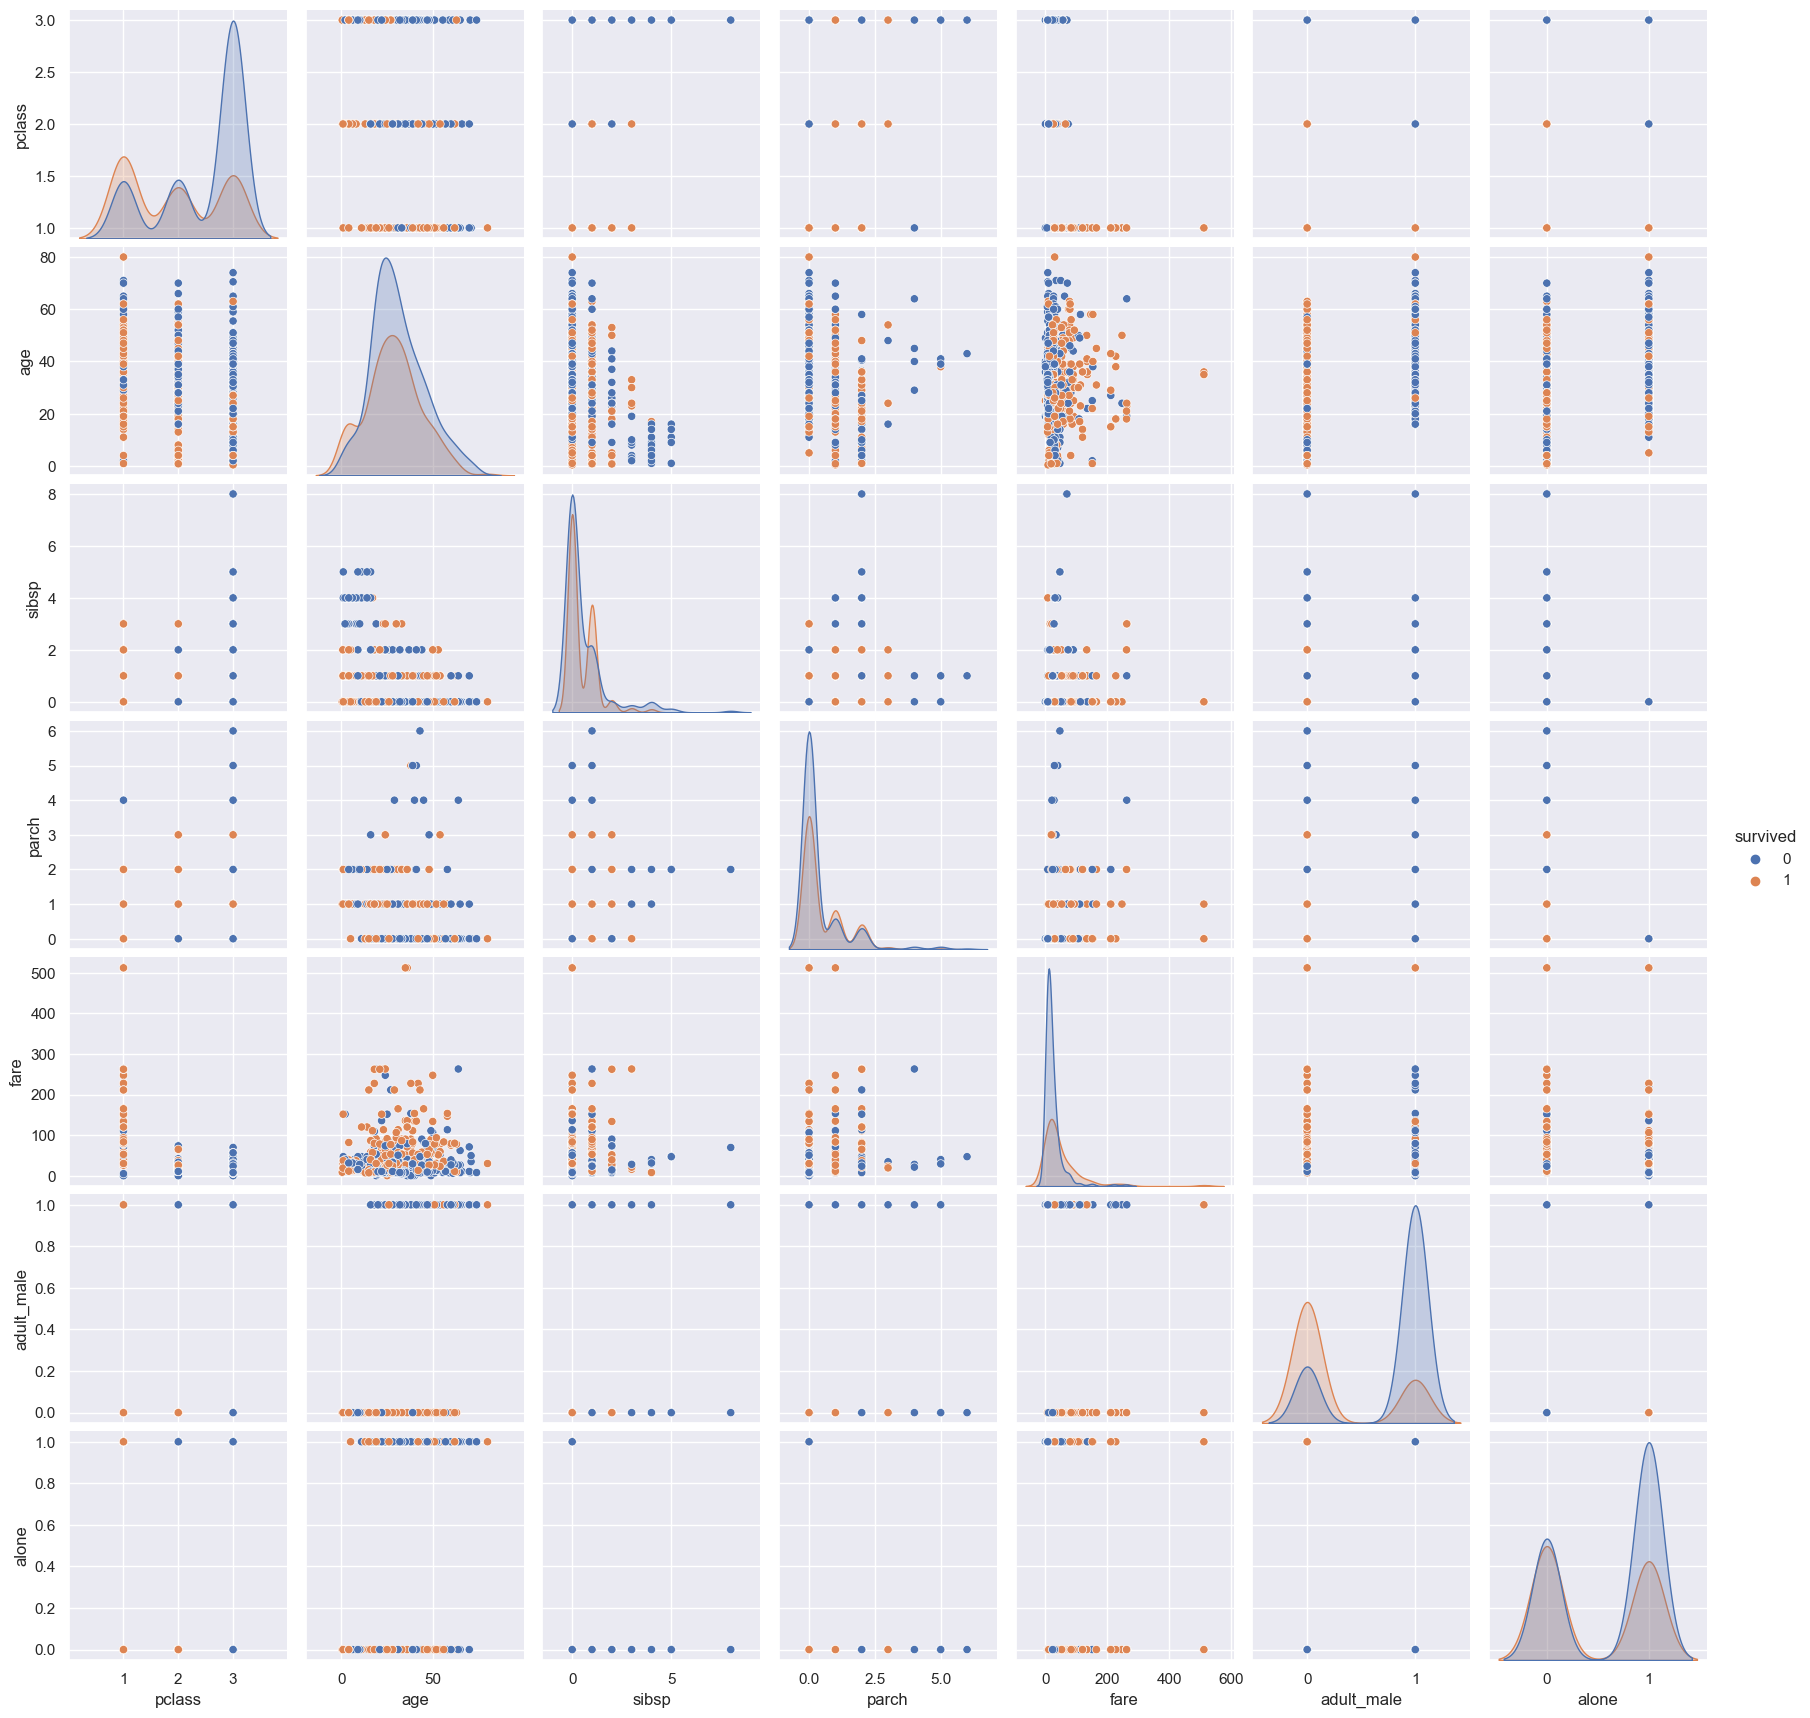

In [9]:
# Use sns.pariplot to visualize.
sns.pairplot(data=df, hue='survived')

# Feature Engineering
For your first model, only include use the `fare` and `sex` as features.
* Convert the `sex` feature to a continuous value by using `pd.get_dummies()`.
* Drop the `sex_female` column as it is the identical inverse of `sex_male`. 
    * Hint, you can use `drop_first=True` in the `pd.get_dummies()` function to have this done automatically.
* Create a `selected_features` variable that is a list of `fare` and `sex_male`.  
* Define your X and y variables.
    * `X` is your selected features
    * `y` is your target features (survived). 
* Split your data into training and testing groups by using `train_test_split()`
    * __IMPORTANT: In `train_test_split` set `random_state=45`, so when you make another model, you can run it on the same random split of data.__

In [10]:
# Convert the sex column into a continuous variable by using pd.get_dummies
data = pd.get_dummies(df, columns=['sex'], drop_first=True)


In [11]:
# # Create a selected_features variable that is a list of fare and sex_male
# selected_features = ['fare', 'sex_male']

# # Define your X and y variables.
# X = data[selected_features]
# y = data['survived']

# # from sklearn.preprocessing import StandardScaler
# # scaler = StandardScaler()
# # X_std = scaler.fit_transform(X)

# # Split your data into training and testing groups by using train_test_split()
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Select our features 
   * only include use the `fare` and `sex_male` as features for this model.

In [12]:
# Select our features
selected_features = ['fare', 'sex_male']

# Set X to be the features we are going to use.
X = data[selected_features]

# Set y to be our target variable. 
y = data['survived']

# Split our data into the testing and training groups. 

In [13]:
# Split our data into testing and training.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

# Print the length and width of our testing data.
print(X_train.shape, X_test.shape)

(627, 2) (157, 2)


# Build and train your model
* Initialize an empty Logistic Regression model. 
* Fit your model with your training data. 
* Predict the values of your testing data

In [14]:
# Initalize our model
clf = LogisticRegression(random_state=47)


# Train our model using our training data.
clf.fit(X_train, y_train)


LogisticRegression(random_state=47)

# Evaluate your model
1. Make predictions of your test data and save them as `y_pred`. 
1. Calculate and print the accuracy, precision, recall, and f1 scores of your model.
    * Hint, sklearn provides helper functions for this.
1. Plot the confusion matrix of your predicted results. 
    * How many True Positives and True Negatives did your model get?

In [15]:
# 1. Make predictions of your test data and save them as `y_pred`. 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
y_pred = clf.predict(X_test)

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.68      0.73        94
           1       0.60      0.71      0.65        63

    accuracy                           0.69       157
   macro avg       0.69      0.70      0.69       157
weighted avg       0.71      0.69      0.70       157



In [17]:
# 2. Calculate and print the accuracy, precision, recall, and f1 scores of your model.

# Calculate our accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate our precision score
precision = precision_score(y_test, y_pred)

# Calculate our recall score
recall = recall_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)

# Print each of our scores to inspect performance.
print("Accuracy Score: %f" % accuracy)
print("Precision Score: %f" % precision)
print("Recall Score: %f" % recall)
print('F1 Score %f' % f1)

Accuracy Score: 0.694268
Precision Score: 0.600000
Recall Score: 0.714286
F1 Score 0.652174


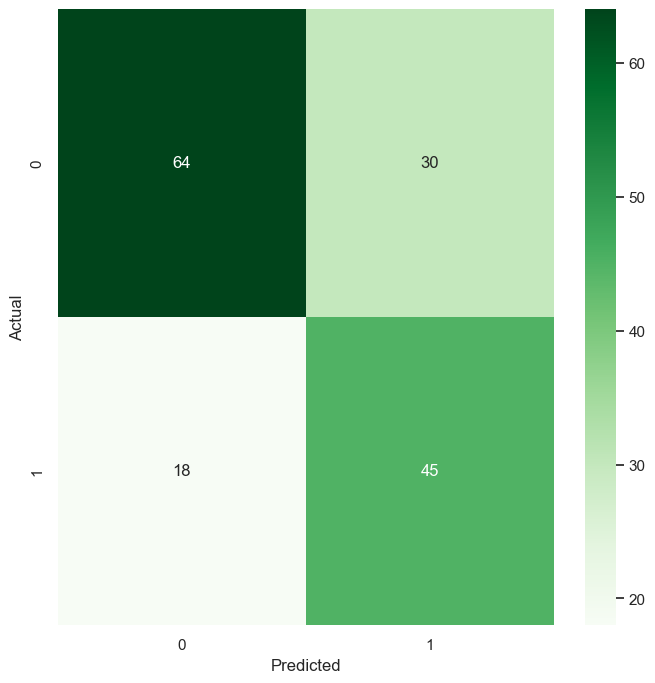

In [18]:
# 1. Plot a confusion matrix of your predicted results. 
import matplotlib.pyplot as plt 
cm = confusion_matrix(y_test, y_pred)
cm = cm.round(2)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(cm, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual');



In [19]:
# How many True Positives and True Negatives did your model get?
print('??? True Negatives and ??? True Positives')

??? True Negatives and ??? True Positives


# Create another model, call this `model_2`.  This time also include the p_class and embarked features. 
1. Run `pd.get_dummies()` on pclass and embarked of your DataFrame.
1. Update your `selected_features` to include the new pclass, embarked, sibsp, and parch features.
1. Define your `X` and `y` variables.
1. Break your data into training and testing groups.
    * __IMPORTANT, In `train_test_split` set `random_state=45` so we will be using the same data rows as our first model__.
1. Initialize a new model, call this one `model_2`
1. Fit / Train your new model
1. Make predictions of your test data and save them as `y_pred`. 
1. Calculate and print the accuracy, precision, recall, and f1 scores of your model.
1. Plot the confusion matrix of your predicted results. 
    * How many True Positives and True Negatives did your model get?
    
Compare the results to your first model. Which model had a better accuracy, recall, precision, and f1 score.

In [20]:
df = pd.read_csv('data/titanic.csv')

# Run pd.get_dummies on pclass and embarked of your DataFrame.
data = pd.get_dummies(df, columns=['sex', 'embarked', 'pclass'], drop_first=True)

data.head()

,passengerid,survived,name,age,sibsp,parch,ticket,fare,cabin,sex_male,embarked_Q,embarked_S,pclass_2,pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1,0,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,1,0,1


Accuracy Score: 0.787709
Precision Score: 0.710526
Recall Score: 0.771429
F1 Score 0.739726


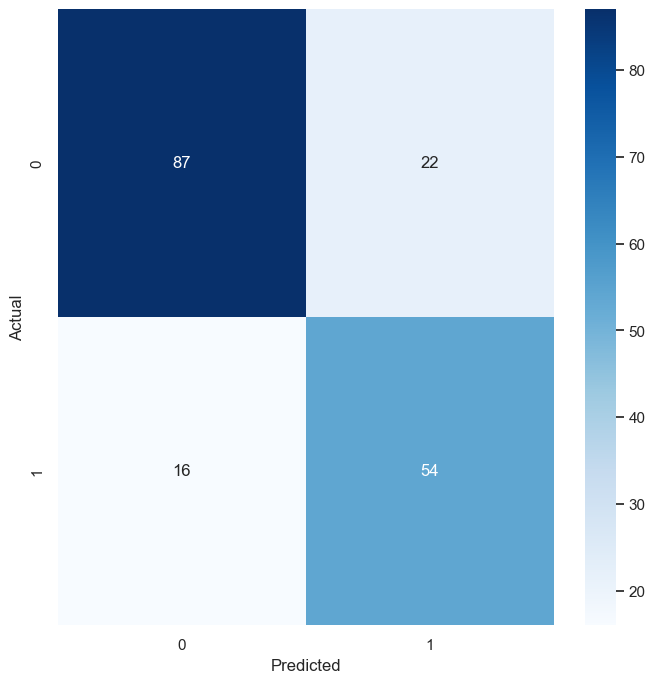

In [23]:
# Update your `selected_features` to include the new pclass and embarked features. 
selected_features = ['fare', 'sex_male', 'embarked_Q', 'embarked_S', 'pclass_2', 'pclass_3']

# Define your X and y variables
X = data[selected_features]
y = data['survived']

# Split our data into testing and training.
# !!! Remeber to use the same random state as you used before
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

# Initalize our model_2
model_2 = LogisticRegression(random_state=47)

# Fit / Train our model using our training data.
model_2.fit(X_train, y_train)

# Make new predicitions using our testing data. 
y_pred_2 = model_2.predict(X_test)

# Calculate our accuracy
accuracy_2 = accuracy_score(y_test, y_pred_2)

# Calculate our precision score
precision_2 = precision_score(y_test, y_pred_2)

# Calculate our recall score
recall_2 = recall_score(y_test, y_pred_2)

# Calculate your f1-score
f1_2 = f1_score(y_test, y_pred_2)

# Print each of our scores to inspect performance.
print("Accuracy Score: %f" % accuracy_2)
print("Precision Score: %f" % precision_2)
print("Recall Score: %f" % recall_2)
print('F1 Score %f' % f1_2)

# Plot your confusion matrix.
# fig = plt.figure(figsize=(8,8))
# plt.xlabel('Predicted')
# plt.ylabel('Actual');



cm_2 = confusion_matrix(y_test, y_pred_2)
cm_2 = cm_2.round(2)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_2).ravel()

fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(cm_2, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual');

# EXTRA CREDIT 1. 
* Use age as a feature. 
* How will you fill the null values?
    * Hint, use `df.age.fillna(???)`
* Make a new feature that 'traveled_alone'.  The sibsp and parch contain the amout of people they are traveling with. Mark everyone that has no sibsp or parch as traveled alone set to 1 and everyone else set to 0. 
    * Once you have this traveled_alone column, you dont need to use the the sibsp and parch cols in your model.

In [40]:
df[df['age'].isna()==False].age.mean()
df.age.mean()

29.69911764705882

In [22]:
df = pd.read_csv('data/titanic.csv')

# Run pd.get_dummies on sex, pclass, and embarked of your DataFrame.
data = pd.get_dummies(data, columns=['sex', 'embarked', 'pclass'])

# Fill null age values with mean age.
df['age'].fillna(value= df['age'].mean(), inplace=True)

# Create new traveled_alone feature
traveled_alone_feature = ['fare', 'sex_male', 'embarked_Q', 'embarked_S', 'pclass_2', 'pclass_3']

# Update your `selected_features` to include the new traveled alone and age


# Define your X and y variables


# Split our data into testing and training.
# Remeber to use the same random state as you used before
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)


# Initalize our model
model_3 = LogisticRegression()

# Fit / Train our model using our training data.

# Make new predicitions using our testing data. 


# Calculate our accuracy
accuracy_3 = 

# Calculate our precision score
precision_3 = 

# Calculate our recall score
recall_3 = 

# Calculate your f1-score
f1_3 = 

# Print each of our scores to inspect performance.
print("Accuracy Score: %f" % accuracy_3)
print("Precision Score: %f" % precision_3)
print("Recall Score: %f" % recall_3)
print('F1 Score %f' % f1_3)

# Plot your confusion matrix.
fig = plt.figure(figsize=(8,8))
plt.xlabel('Predicted')
plt.ylabel('Actual');

SyntaxError: invalid syntax (919971584.py, line 32)

# EXTRA CREDIT 2:  

Use stats models to create a summary report.  Interpret the results. 